In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
import calendar
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('avocado.csv')


In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [4]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Dec
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Dec
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Dec
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Dec
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Nov


In [6]:
df_month = df.copy()
df_barchart_type = df.copy()

In [7]:
df=pd.get_dummies(df)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,1,0,0,0,0,0,0,0,0,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,1,0,0,0,0,0,0,0,0,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,1,0,0,0,0,0,0,0,0,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,1,0,0,0,0,0,0,0,0,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [9]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'type_conventional', 'type_organic', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTuc

In [10]:
y = df["AveragePrice"].values.reshape(-1, 1)


X = df.drop(["AveragePrice","Date","Total Volume","Total Bags"],axis=1)

##print(X.shape, y.shape)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
##Linear Regression
##from sklearn.preprocessing import StandardScaler


##X_scaler = StandardScaler().fit(X_train)
##y_scaler = StandardScaler().fit(y_train)

In [13]:
##X_train_scaled = X_scaler.transform(X_train)
##X_test_scaled = X_scaler.transform(X_test)
##y_train_scaled = y_scaler.transform(y_train)
##y_test_scaled = y_scaler.transform(y_test)

In [14]:
##from sklearn.linear_model import LinearRegression
##model = LinearRegression()
##model.fit(X_train_scaled, y_train_scaled)

In [15]:
##predictions = model.predict(X_test_scaled)
##model.fit(X_train_scaled, y_train_scaled)
#plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

In [16]:
##paramaters
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [17]:
##X_test is what the data will be trained on and y will give the actual scores
##regression score perfectly fits the data
regressor.score(X_train,y_train)

1.0

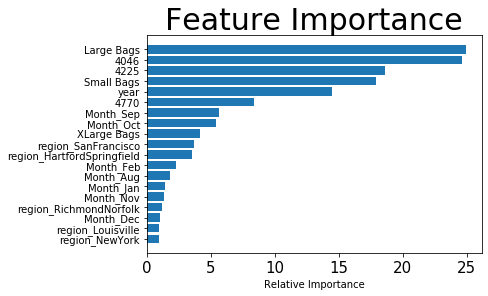

In [18]:
# checking which are the most important features
feature_importance = regressor.fit(X_train, y_train).feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

##PLU - price look up
##Small/Medium Hass Avocado (~3-5oz avocado) | #4046

##Large Hass Avocado (~8-10oz avocado) | #4225

##Extra Large Hass Avocado (~10-15oz avocado) | #4770

##Hass Avocado Bags | Size varies

In [19]:
ypred = regressor.predict(X_test)


In [20]:
X_test.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic,region_Albany,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
8604,79239.58,26356.05,2998.74,73393.34,34338.97,2003.02,2018,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2608,228324.13,72749.38,100.62,44449.47,45890.83,0.00,2015,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14581,1147.09,39.51,0.00,2717.47,3.33,0.00,2016,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4254,150786.30,27025.48,565.65,74664.71,14911.64,0.00,2016,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16588,828.39,3.24,0.00,7456.43,517.22,0.00,2017,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
predictions = pd.DataFrame(y_test,ypred).reset_index()

In [22]:
predictions.columns=["True", "Predictions"]

In [23]:
predictions.head()

,True,Predictions
0,1.06,0.82
1,0.97,0.97
2,1.43,1.44
3,0.90,0.97
4,1.51,1.45


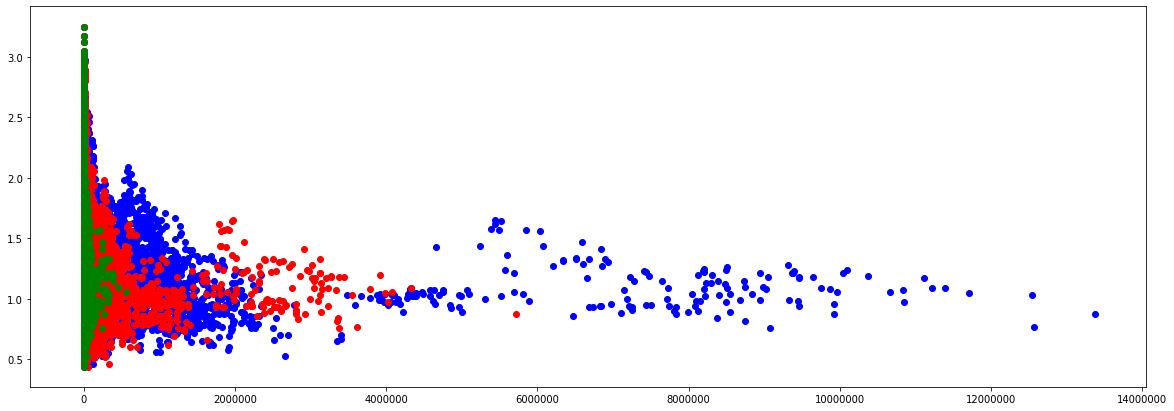

In [24]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.scatter(df['Small Bags'], df['AveragePrice'], c="blue")
plt.scatter(df['Large Bags'], df['AveragePrice'], c="red")
plt.scatter(df['XLarge Bags'], df['AveragePrice'], c="green")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [25]:
x_axis = df_month['Month']
x_axis

0        Dec
1        Dec
2        Dec
3        Dec
4        Nov
        ... 
18244    Feb
18245    Jan
18246    Jan
18247    Jan
18248    Jan
Name: Month, Length: 18249, dtype: object

<BarContainer object of 18249 artists>

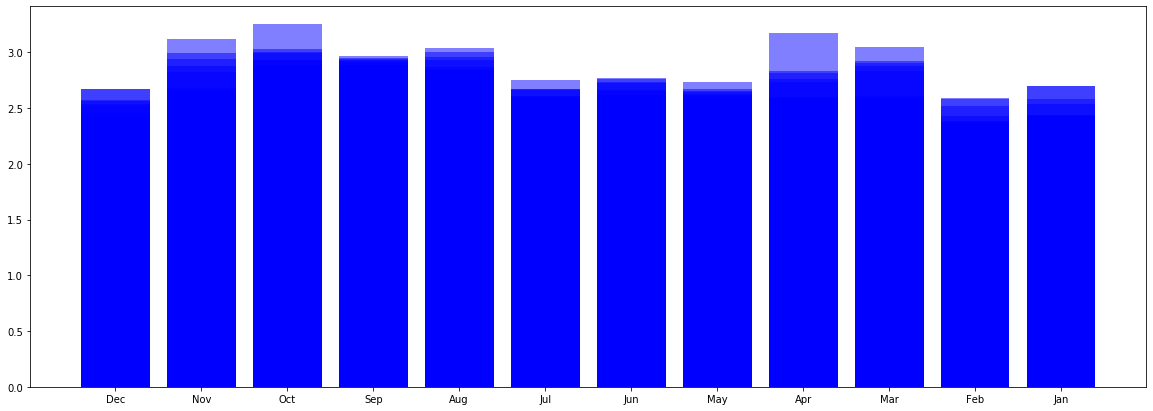

In [26]:


y_axis = df_month['AveragePrice']
x_axis = df_month['Month']


plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")

In [27]:
df_barchart_type.columns
df_barchart_type.head()
barchart = df_barchart_type.groupby(['type'])['Total Volume'].sum().to_frame(name = 'sum').reset_index()
barchart

,type,sum
0,conventional,1.508722e+10
1,organic,4.361817e+08


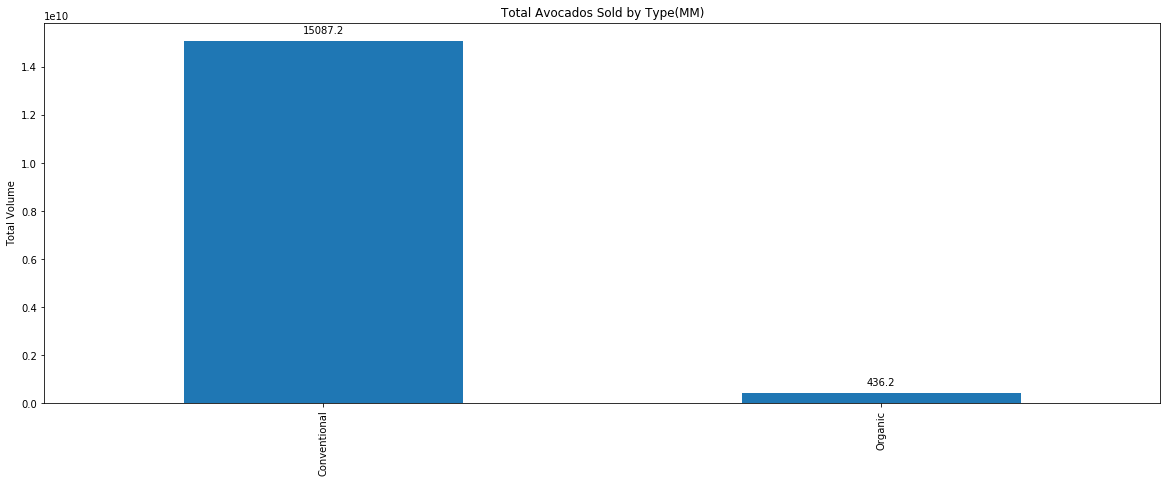

In [28]:
Labels = ['Conventional','Organic']
y_axis = barchart['sum']
x_axis = barchart['type']
##width = 0.35

x = np.arange(len(Labels))  
##fig, ax = plt.subplots()
##rects1 = ax.bar(x - width/2, y_axis,width)
##rects2 = ax.bar(x + width/2, y_axis,width, label='Organic')


##ax.set_xticks(x)
##ax.legend()

##plt.figure(figsize=(12, 8))
ax = y_axis.plot(kind='bar')
ax.set_title('Total Avocados Sold by Type(MM)')
##ax.set_xlabel('Amount ($)')
ax.set_ylabel('Total Volume')
ax.set_xticklabels(Labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value/1e6)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

Text(0, 0.5, 'Average Price')

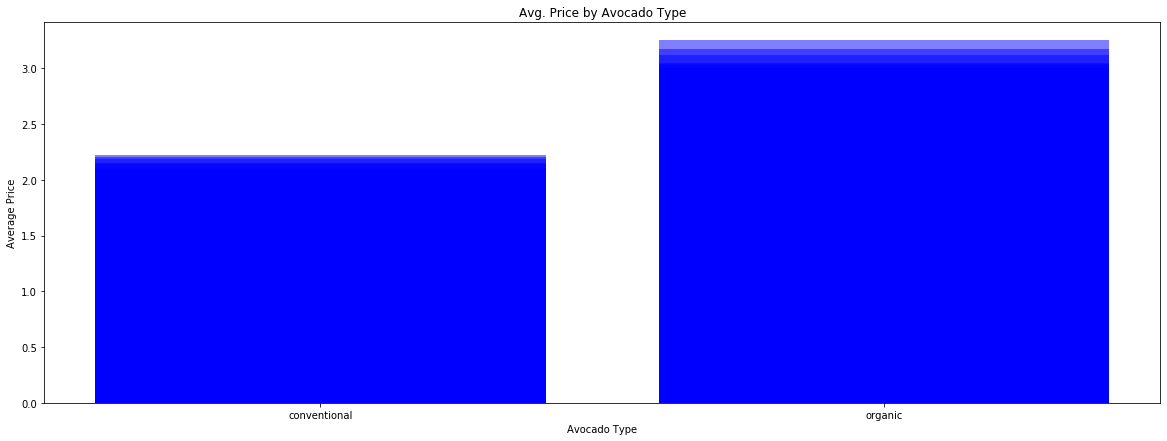

In [29]:
y_axis = df_month['AveragePrice']
x_axis = df_month['type']

plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
plt.title("Avg. Price by Avocado Type")
plt.xlabel("Avocado Type")
plt.ylabel("Average Price")